In [45]:
import pandas as pd 
import numpy as np 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint 

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv("../datasets/one_hot_encoded/combined-data.csv")

data.describe()
data.head()

,Year,Temperature,Co2,Country_Albania,Country_Algeria,Country_Angola,Country_Anguilla,Country_Antigua and Barbuda,Country_Argentina,Country_Australia,...,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Vanuatu,Country_Vietnam,Country_Western Sahara,Country_Zambia,Country_Zimbabwe
0,1970,0.248,8.952570,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1970,0.082,0.002168,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1970,-0.106,4.814516,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1970,0.422,19.437564,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1970,0.438,88.321009,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
means = data.groupby('Year', as_index=False).mean()


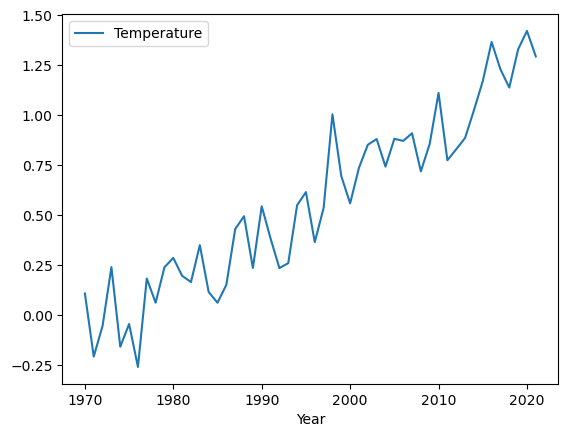

In [23]:
import matplotlib.pyplot as plt

means.plot(x="Year", y="Temperature")

plt.show()

<Axes: xlabel='Co2', ylabel='Temperature'>

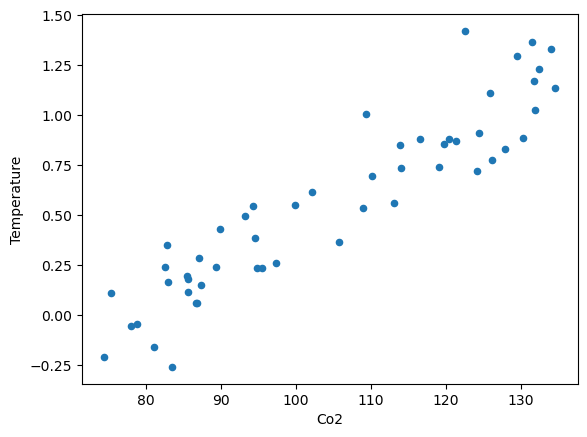

In [53]:
means.plot(kind="scatter", x="Co2", y="Temperature")

<Axes: xlabel='Co2', ylabel='Temperature'>

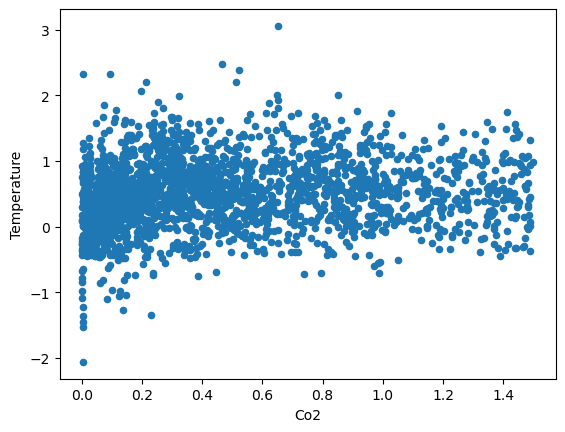

In [52]:
data.query("Co2 < 1.5").plot(kind="scatter", x="Co2", y="Temperature")

In [25]:
X = data[["Year", "Co2"]].to_numpy()
y = data["Temperature"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


[  0.12380769  42.13283909   0.90547143 ... 120.4383691    0.22423294
   0.40945745]


In [28]:
data = data.groupby('Year', as_index=False).mean()

rf = RandomForestRegressor()
rf.fit(X_train.reshape(-1, 1), y_train)


[[  0.12380769]
 [ 42.13283909]
 [  0.90547143]
 ...
 [120.4383691 ]
 [  0.22423294]
 [  0.40945745]]


RandomForestRegressor()

In [29]:
y_pred = rf.predict(X_test.reshape(-1, 1))

In [43]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", r2)

MSE:  0.49329642798284634
MAE:  0.5452818877674886
R2 Score:  -0.3241439141806528


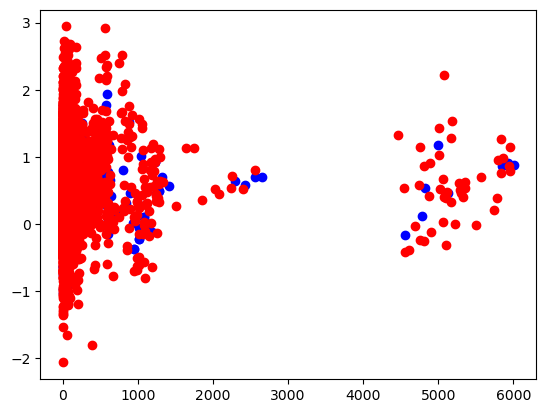

In [49]:
plt.scatter(X_test, y_pred, color="blue")
plt.scatter(X_train, y_train, color="red")
# plt.scatter(X, y, color="black")